## Effects of 2-qubit gate errors.

In this task we need to write a function that will perturb the angle of each 2-qubit gate by a fixed amount $\Delta\Theta$ in order to simulate the systematic error. Additionally, we need to plot linear cross-entropy benchmarking (XEB) fidelity as a function of $\Delta\Theta$. Introducing errors will make the circuit more unpredictable.

Like in the previous tasks we will import the __task_functions__ library

In [1]:
include("task_functions.jl")

perturb (generic function with 1 method)

We made further modifications to our __run_random_circuit__ function. This iteration adds a systematic error.

In [2]:
#Runs random circuit with systemic error
function run_sysErr(N, depth, flipon, delta)
    # Random circuit.
    gates = Vector{Tuple}[]
    if flipon == true
        td=rand(1:depth)
        tN=rand(1:N)
    end
    for i in 1:depth
        one_qubit_layer = Tuple[]
        two_qubit_layer = Tuple[]

        for j in 1:N
            gate = ("R", j, (theta=2pi*rand(), phi=2pi*rand()))
            push!(one_qubit_layer, gate)
            if flipon == true
                if j==tN && i==td
                    push!(one_qubit_layer, ("X", j))
                end
            end
        end

        # Alternate start qubit for pairs.
        idx_first = i % 2 + 1

        for j in idx_first:2:(N-1)
            gate = ("M_p", (j, j+1), (Theta=2pi*rand(), delta))
            push!(two_qubit_layer, gate)
        end

        push!(gates, one_qubit_layer)
        push!(gates, two_qubit_layer)

    end
    psi = runcircuit(N, gates)
end

run_sysErr (generic function with 1 method)

We also added two additional functions for our task

In [3]:
#This functions create P(xi) samples for equation #1
function run_sampling(s,N,depth,flipon,delta)
    fxeb=zeros(2^N)
    for i=1:s
        psi=run_sysErr(N,depth,flipon,delta)
        fxeb=fxeb+get_Probs(psi,N)
    end
    fxeb=(2^N)*fxeb/s .-1
    return fxeb
end

#Applying the perturbation for series of DeltaThetas between zero to 2pi with the steps 2pi/gran
function perturb(gran,s,N,depth,flipon,site)
    deltas=zeros(0)
    avg_fxeb=zeros(0)
    for x=0:pi/gran:2pi
        append!(deltas,x)
        fxeb=run_sampling(s,N,depth,flipon,x)
        append!(avg_fxeb,fxeb[site])
    end
    return deltas,avg_fxeb
end

perturb (generic function with 1 method)

Sample run #1

In [4]:
deltas, fxeb = perturb(50,50,4,150,false,1)

([0.0, 0.06283185307179587, 0.12566370614359174, 0.1884955592153876, 0.25132741228718347, 0.3141592653589793, 0.3769911184307752, 0.4398229715025711, 0.5026548245743669, 0.5654866776461628  …  5.6548667764616285, 5.717698629533424, 5.7805304826052195, 5.843362335677016, 5.906194188748811, 5.969026041820608, 6.031857894892403, 6.094689747964199, 6.157521601035995, 6.220353454107791], [-0.1330849868934283, -0.20397941975042055, -0.11562574366511258, -0.09000980131790581, -0.03336390126112643, 0.050624104800018666, 0.10001438843418065, -0.08886924893224446, -0.15106909050847162, 0.10777455431612548  …  -0.12186301171906877, -0.05736358732340008, 0.11343563948858071, 0.11164828003448513, -0.07020262350344841, 0.04112728796531018, -0.22923165931459732, 0.1594846481850558, -0.06775897501570494, -0.01577820493827775])

Plot

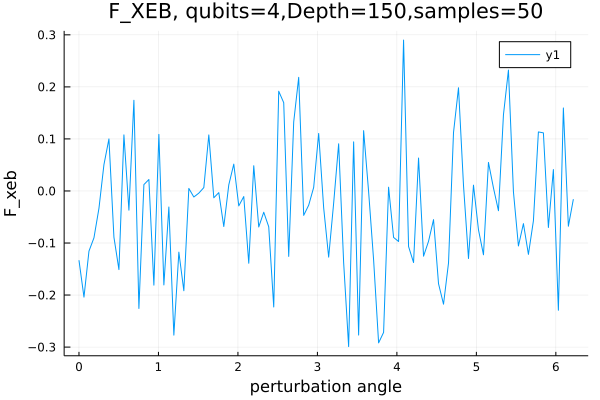

In [5]:
plot(deltas,fxeb, title="F_XEB, qubits=4,Depth=150,samples=50",xlabel = "perturbation angle", ylabel = "F_xeb")